In [2]:
import scanpy as sc
import pandas as pd
import os
import glob 
import sys 
import matplotlib as plt
import seaborn as sns 
import anndata as ad
import numpy as np
import statannot
import matplotlib.pyplot as plt

# Get the 4wk dataset

In [43]:
NHP_Mtb_granuloma_4wk= sc.read('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/expression/61fb59c2771a5b0d8b1804f1/matrix.mtx')




In [44]:
NHP_Mtb_granuloma_4wk

AnnData object with n_obs × n_vars = 24820 × 10006

In [47]:
NHP_Mtb_granuloma_4wk=NHP_Mtb_granuloma_4wk.T

In [48]:
NHP_Mtb_granuloma_4wk

AnnData object with n_obs × n_vars = 10006 × 24820

In [49]:
NHP_Mtb_granuloma_4wk.var.index = pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/expression/61fb59c2771a5b0d8b1804f1/genes.tsv', sep='\t', header=None).loc[:,0].values
NHP_Mtb_granuloma_4wk.obs.index =pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/expression/61fb59c2771a5b0d8b1804f1/barcodes.tsv', sep='\t', header=None).loc[:,0].values


In [60]:
NHP_Mtb_granuloma_4wk_raw= sc.read('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/expression/61fb5892771a5b0d8b1804db/4Week_countsmatrix.mtx')
NHP_Mtb_granuloma_4wk_raw=NHP_Mtb_granuloma_4wk_raw.T
NHP_Mtb_granuloma_4wk_raw.var.index = pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/expression/61fb5892771a5b0d8b1804db/4Week_features.tsv', sep='\t', header=None).loc[:,0].values
NHP_Mtb_granuloma_4wk_raw.obs.index =pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/expression/61fb5892771a5b0d8b1804db/4Week_barcodes.tsv', sep='\t', header=None).loc[:,0].values



In [37]:
meta=pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/metadata/Updated4wk_alexandria_structured_metadata3.txt',
                 sep='\t', header=0)

In [38]:
meta

,NAME,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,...,biosample_type,disease__time_since_onset,disease__time_since_onset__unit,disease__time_since_onset__unit_label,library_preparation_protocol,library_preparation_protocol__ontology_label,organ,organ__ontology_label,cell_type,cell_type__ontology_label
0,TYPE,numeric,numeric,group,group,group,numeric,group,group,group,...,group,numeric,group,group,group,group,group,group,group,group
1,Array4_23118_TATTACCCCGCA,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
2,Array4_23118_CTCTTCCGCCTA,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
3,Array4_23118_CATGTCTCCTGC,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000057,fibroblast
4,Array4_23118_GTAACTCCCCGA,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Array6_24118_CGAATATTCCAA,525,337,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
10003,Array6_24118_TCTTGATCGCCC,511,354,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
10004,Array6_24118_CTACCCTGTCGT,513,331,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
10005,Array6_24118_CGTCGGCATCCT,509,323,Array6_24118,24118,Macrophage,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage


In [39]:
meta= meta.iloc[1:, :]

In [40]:
meta.set_index('NAME', inplace=True)

In [41]:
meta

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,biosample_type,disease__time_since_onset,disease__time_since_onset__unit,disease__time_since_onset__unit_label,library_preparation_protocol,library_preparation_protocol__ontology_label,organ,organ__ontology_label,cell_type,cell_type__ontology_label
NAME,,,,,,,,,,,,,,,,,,,,,
Array4_23118_TATTACCCCGCA,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CTCTTCCGCCTA,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CATGTCTCCTGC,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000057,fibroblast
Array4_23118_GTAACTCCCCGA,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CGCCGTCTGATC,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array6_24118_CGAATATTCCAA,525,337,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
Array6_24118_TCTTGATCGCCC,511,354,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
Array6_24118_CTACCCTGTCGT,513,331,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell


In [55]:
NHP_Mtb_granuloma_4wk.obs = NHP_Mtb_granuloma_4wk.obs.join(meta)

In [56]:
NHP_Mtb_granuloma_4wk.obs.head()

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,biosample_type,disease__time_since_onset,disease__time_since_onset__unit,disease__time_since_onset__unit_label,library_preparation_protocol,library_preparation_protocol__ontology_label,organ,organ__ontology_label,cell_type,cell_type__ontology_label
Array4_23118_TATTACCCCGCA,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CTCTTCCGCCTA,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CATGTCTCCTGC,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000057,fibroblast
Array4_23118_GTAACTCCCCGA,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CGCCGTCTGATC,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage


In [57]:
NHP_Mtb_granuloma_4wk.obs.CellTypeAnnotations.value_counts()

Macrophage     5430
T              2713
Neutrophil      437
T2P             367
Mast            364
B               206
Fibroblast      139
Endothelial     122
Club             94
pDC              90
Plasma           44
Name: CellTypeAnnotations, dtype: int64

In [59]:
NHP_Mtb_granuloma_4wk.X.A

array([[0.        , 0.        , 0.        , ..., 1.028374  , 0.        ,
        0.78740066],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5113863 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [61]:
NHP_Mtb_granuloma_4wk_raw.X.A

array([[0., 0., 0., ..., 3., 0., 2.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
NHP_Mtb_granuloma_4wk.layers['counts']=NHP_Mtb_granuloma_4wk_raw.X

In [63]:
NHP_Mtb_granuloma_4wk.write('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/NHP_Mtb_granuloma_4wk_adata.h5ad')
    

In [86]:
NHP_Mtb_granuloma_4wk.X

<10006x24820 sparse matrix of type '<class 'numpy.float32'>'
	with 14222226 stored elements in Compressed Sparse Row format>

# Get the 10wk dataset

In [66]:
counts_pt1 =pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/expression/counts_pt_1.csv')

In [67]:
counts_pt1

,GENE,Array1_3817_AAAACCCATATC,Array1_3817_AAAAGTAGTTTA,Array1_3817_AAACATTGACCC,Array1_3817_AAACGCAATCCT,Array1_3817_AAACGTCGTACA,Array1_3817_AAACTACCGTGT,Array1_3817_AAAGCCAATCTG,Array1_3817_AAAGGGTTTATT,Array1_3817_AAATCCGCACAC,...,Array2_4217_GGTGTCCGTTCT,Array2_4217_GGTGTTTTCGTT,Array2_4217_GGTTAACTACTG,Array2_4217_GGTTACATATGA,Array2_4217_GGTTAGCCTACC,Array2_4217_GGTTAGCTCACC,Array2_4217_GGTTATGTTATG,Array2_4217_GGTTATTCTGAC,Array2_4217_GGTTCCGAACGG,Array2_4217_GGTTCCTAGAAA
0,A1BG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A2ML1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A3GALT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A4GALT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A4GNT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28150,LOC107130452,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28151,LOC107130791,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28152,SCP2D1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28153,TAS2R8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
counts_pt2 = pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/expression/counts_pt_2.csv')

In [69]:
counts_pt2

,GENE,Array2_4217_GGTTCCTGAGTT,Array2_4217_GGTTCGGTGCCC,Array2_4217_GGTTGACAAGGG,Array2_4217_GGTTGAGTTTGC,Array2_4217_GGTTGCATCCAA,Array2_4217_GGTTGCTTTATT,Array2_4217_GGTTTAAGCACG,Array2_4217_GGTTTACGAAGA,Array2_4217_GGTTTCCGCTTT,...,Array9_4017_TTTTTCAGATCT,Array9_4017_TTTTTCAGGAAT,Array9_4017_TTTTTCCAGGTT,Array9_4017_TTTTTCCTTAAC,Array9_4017_TTTTTCGCAAAT,Array9_4017_TTTTTGAGGCCT,Array9_4017_TTTTTGGAAACC,Array9_4017_TTTTTGTGCCTC,Array9_4017_TTTTTTAAAGAT,Array9_4017_TTTTTTCACCTT
0,A1BG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A2ML1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A3GALT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A4GALT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A4GNT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28150,LOC107130452,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28151,LOC107130791,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28152,SCP2D1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28153,TAS2R8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
all_counts = pd.concat([counts_pt2, counts_pt1], axis=1)

In [75]:
all_counts = all_counts.iloc[:, 1:]

In [76]:
all_counts

,Array2_4217_GGTTCCTGAGTT,Array2_4217_GGTTCGGTGCCC,Array2_4217_GGTTGACAAGGG,Array2_4217_GGTTGAGTTTGC,Array2_4217_GGTTGCATCCAA,Array2_4217_GGTTGCTTTATT,Array2_4217_GGTTTAAGCACG,Array2_4217_GGTTTACGAAGA,Array2_4217_GGTTTCCGCTTT,Array2_4217_GTAAAGATCTCG,...,Array2_4217_GGTGTCCGTTCT,Array2_4217_GGTGTTTTCGTT,Array2_4217_GGTTAACTACTG,Array2_4217_GGTTACATATGA,Array2_4217_GGTTAGCCTACC,Array2_4217_GGTTAGCTCACC,Array2_4217_GGTTATGTTATG,Array2_4217_GGTTATTCTGAC,Array2_4217_GGTTCCGAACGG,Array2_4217_GGTTCCTAGAAA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
all_counts.set_index('GENE', inplace=True)

In [78]:
all_counts

,Array2_4217_GGTTCCTGAGTT,Array2_4217_GGTTCGGTGCCC,Array2_4217_GGTTGACAAGGG,Array2_4217_GGTTGAGTTTGC,Array2_4217_GGTTGCATCCAA,Array2_4217_GGTTGCTTTATT,Array2_4217_GGTTTAAGCACG,Array2_4217_GGTTTACGAAGA,Array2_4217_GGTTTCCGCTTT,Array2_4217_GTAAAGATCTCG,...,Array2_4217_GGTGTCCGTTCT,Array2_4217_GGTGTTTTCGTT,Array2_4217_GGTTAACTACTG,Array2_4217_GGTTACATATGA,Array2_4217_GGTTAGCCTACC,Array2_4217_GGTTAGCTCACC,Array2_4217_GGTTATGTTATG,Array2_4217_GGTTATTCTGAC,Array2_4217_GGTTCCGAACGG,Array2_4217_GGTTCCTAGAAA
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GNT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC107130452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOC107130791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCP2D1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
adata= ad.AnnData(all_counts)

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_83668/1603254261.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata= ad.AnnData(all_counts)


In [80]:
adata

AnnData object with n_obs × n_vars = 28155 × 109584

In [82]:
adata=adata.T

In [83]:
adata.var

""
GENE
A1BG
A2ML1
A3GALT2
A4GALT
A4GNT
...
LOC107130452
LOC107130791
SCP2D1


In [89]:
from scipy import sparse

In [84]:
adata.obs

""
Array2_4217_GGTTCCTGAGTT
Array2_4217_GGTTCGGTGCCC
Array2_4217_GGTTGACAAGGG
Array2_4217_GGTTGAGTTTGC
Array2_4217_GGTTGCATCCAA
...
Array2_4217_GGTTAGCTCACC
Array2_4217_GGTTATGTTATG
Array2_4217_GGTTATTCTGAC
Array2_4217_GGTTCCGAACGG


In [91]:
adata.layers['counts']= sparse.csr_matrix(adata.X)

In [92]:
adata.X=adata.layers['counts']


In [93]:
adata.write('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_10wk_adata.h5ad')

In [94]:
lognormalized_pt1 =pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/expression/lognormalized_pt_1.csv')

In [95]:
lognormalized_pt1

,GENE,Array1_3817_AAAACCCATATC,Array1_3817_AAAAGTAGTTTA,Array1_3817_AAACATTGACCC,Array1_3817_AAACGCAATCCT,Array1_3817_AAACGTCGTACA,Array1_3817_AAACTACCGTGT,Array1_3817_AAAGCCAATCTG,Array1_3817_AAAGGGTTTATT,Array1_3817_AAATCCGCACAC,...,Array2_4217_GGTGTCCGTTCT,Array2_4217_GGTGTTTTCGTT,Array2_4217_GGTTAACTACTG,Array2_4217_GGTTACATATGA,Array2_4217_GGTTAGCCTACC,Array2_4217_GGTTAGCTCACC,Array2_4217_GGTTATGTTATG,Array2_4217_GGTTATTCTGAC,Array2_4217_GGTTCCGAACGG,Array2_4217_GGTTCCTAGAAA
0,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A2ML1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3GALT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A4GALT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A4GNT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28150,LOC107130452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28151,LOC107130791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28152,SCP2D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28153,TAS2R8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
lognormalized_pt2 =pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/expression/lognormalized_pt_2.csv')


In [97]:
lognormalized_pt2

,GENE,Array2_4217_GGTTCCTGAGTT,Array2_4217_GGTTCGGTGCCC,Array2_4217_GGTTGACAAGGG,Array2_4217_GGTTGAGTTTGC,Array2_4217_GGTTGCATCCAA,Array2_4217_GGTTGCTTTATT,Array2_4217_GGTTTAAGCACG,Array2_4217_GGTTTACGAAGA,Array2_4217_GGTTTCCGCTTT,...,Array9_4017_TTTTTCAGATCT,Array9_4017_TTTTTCAGGAAT,Array9_4017_TTTTTCCAGGTT,Array9_4017_TTTTTCCTTAAC,Array9_4017_TTTTTCGCAAAT,Array9_4017_TTTTTGAGGCCT,Array9_4017_TTTTTGGAAACC,Array9_4017_TTTTTGTGCCTC,Array9_4017_TTTTTTAAAGAT,Array9_4017_TTTTTTCACCTT
0,A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A2ML1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A3GALT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A4GALT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A4GNT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28150,LOC107130452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28151,LOC107130791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28152,SCP2D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28153,TAS2R8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
all_log_counts = pd.concat([lognormalized_pt1, lognormalized_pt2], axis=1)

In [100]:
all_log_counts=all_log_counts.iloc[:, 1:]

In [101]:
all_log_counts.set_index('GENE', inplace=True)

In [102]:
all_log_counts

,Array1_3817_AAAACCCATATC,Array1_3817_AAAAGTAGTTTA,Array1_3817_AAACATTGACCC,Array1_3817_AAACGCAATCCT,Array1_3817_AAACGTCGTACA,Array1_3817_AAACTACCGTGT,Array1_3817_AAAGCCAATCTG,Array1_3817_AAAGGGTTTATT,Array1_3817_AAATCCGCACAC,Array1_3817_AAATCTGAGCCA,...,Array9_4017_TTTTTCAGATCT,Array9_4017_TTTTTCAGGAAT,Array9_4017_TTTTTCCAGGTT,Array9_4017_TTTTTCCTTAAC,Array9_4017_TTTTTCGCAAAT,Array9_4017_TTTTTGAGGCCT,Array9_4017_TTTTTGGAAACC,Array9_4017_TTTTTGTGCCTC,Array9_4017_TTTTTTAAAGAT,Array9_4017_TTTTTTCACCTT
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ML1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A3GALT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A4GALT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A4GNT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LOC107130452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LOC107130791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SCP2D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
all_log_counts=all_log_counts.T

In [106]:
all_log_counts

GENE,A1BG,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADACL3,AADACL4,AADAT,...,LOC107129880,LOC107130001,LOC107130003,LOC107130322,LOC107130329,LOC107130452,LOC107130791,SCP2D1,TAS2R8,TMEM247
Array1_3817_AAAACCCATATC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Array1_3817_AAAAGTAGTTTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Array1_3817_AAACATTGACCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Array1_3817_AAACGCAATCCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Array1_3817_AAACGTCGTACA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array9_4017_TTTTTGAGGCCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Array9_4017_TTTTTGGAAACC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Array9_4017_TTTTTGTGCCTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Array9_4017_TTTTTTAAAGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
adata

AnnData object with n_obs × n_vars = 109584 × 28155
    layers: 'counts'

In [107]:
adata.X = all_log_counts.loc[adata.obs.index, adata.var.index]

In [108]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
meta=pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/metadata/Updated10wk_alexandria_structured_metadata10.txt', sep='\t', header=0)

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_11697/2200802244.py:1: DtypeWarning: Columns (1,2,10,15,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  meta=pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/metadata/Updated10wk_alexandria_structured_metadata10.txt', sep='\t', header=0)


In [199]:
meta= meta.iloc[1:, :]

In [200]:
meta.set_index('NAME', inplace=True)

In [201]:
meta

,nCount_RNA,nFeature_RNA,CellID,GenericFinal,SpecificFinal,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,disease__time_since_onset,...,Size_8_wks,Size_10_wks,SUV_4_wks,SUV_8_wks,SUV_10_wks,paired_ends,end_bias,CellTypeGroup,GranulomaBurden,GranulomaTiming
NAME,,,,,,,,,,,,,,,,,,,,,
Array1_3817_AAAACCCATATC,2777,1203,Array1_3817_AAAACCCATATC,Neutrophil,Neutrophil,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,2.8,2.4,3.08,4.2,5.72,True,3 prime end bias,Group4,HighBurden,Early
Array1_3817_AAAAGTAGTTTA,991,499,Array1_3817_AAAAGTAGTTTA,Neutrophil,Neutrophil,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,2.8,2.4,3.08,4.2,5.72,True,3 prime end bias,Group4,HighBurden,Early
Array1_3817_AAACATTGACCC,1876,1206,Array1_3817_AAACATTGACCC,T1P,T1P,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,2.8,2.4,3.08,4.2,5.72,True,3 prime end bias,Group2,HighBurden,Early
Array1_3817_AAACGCAATCCT,1699,930,Array1_3817_AAACGCAATCCT,T,TCytotoxic4,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,2.8,2.4,3.08,4.2,5.72,True,3 prime end bias,Group3,HighBurden,Early
Array1_3817_AAACGTCGTACA,2332,1168,Array1_3817_AAACGTCGTACA,T,TT1T17Pop1,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,2.8,2.4,3.08,4.2,5.72,True,3 prime end bias,Group3,HighBurden,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array9_4017_TTTTTGAGGCCT,1524,719,Array9_4017_TTTTTGAGGCCT,Mast,Mast,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,0.0,3.8,0.0,0.0,5.02,True,3 prime end bias,Group2,HighBurden,Early
Array9_4017_TTTTTGGAAACC,1068,685,Array9_4017_TTTTTGGAAACC,T,T,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,0.0,3.8,0.0,0.0,5.02,True,3 prime end bias,NaN,HighBurden,Early
Array9_4017_TTTTTGTGCCTC,4488,1467,Array9_4017_TTTTTGTGCCTC,T,TStemLike,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,...,0.0,3.8,0.0,0.0,5.02,True,3 prime end bias,Group3,HighBurden,Early


In [43]:
meta=meta[meta.columns [ np.isin(meta.columns, NHP_Mtb_granuloma_4wk.obs.columns)]]

In [44]:
meta

,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,disease__ontology_label,...,biosample_type,disease__time_since_onset,disease__time_since_onset__unit,disease__time_since_onset__unit_label,library_preparation_protocol,library_preparation_protocol__ontology_label,organ,organ__ontology_label,cell_type,cell_type__ontology_label
NAME,,,,,,,,,,,,,,,,,,,,,
Array4_23118_TATTACCCCGCA,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CTCTTCCGCCTA,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CATGTCTCCTGC,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000057,fibroblast
Array4_23118_GTAACTCCCCGA,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
Array4_23118_CGCCGTCTGATC,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array6_24118_CGAATATTCCAA,525,337,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
Array6_24118_TCTTGATCGCCC,511,354,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
Array6_24118_CTACCCTGTCGT,513,331,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,tuberculosis,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell


In [141]:
adata.obs.drop(columns=adata.obs.columns, inplace=True)

In [142]:
adata.obs=adata.obs.join(meta)

In [143]:
adata.obs

,nCount_RNA,nFeature_RNA,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,disease__time_since_onset,biosample_id,biosample_type,disease,...,organ,organ__ontology_label,cell_type,cell_type__ontology_label,is_living,sex,disease__time_since_onset__unit_label,disease__time_since_onset__unit,paired_ends,end_bias
Array2_4217_GGTTCCTGAGTT,2106,1151,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000235,macrophage,no,unknown,week,UO_0000034,True,3 prime end bias
Array2_4217_GGTTCGGTGCCC,1032,669,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias
Array2_4217_GGTTGACAAGGG,1174,720,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias
Array2_4217_GGTTGAGTTTGC,1216,646,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias
Array2_4217_GGTTGCATCCAA,863,547,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array2_4217_GGTTAGCTCACC,1120,724,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias
Array2_4217_GGTTATGTTATG,1253,690,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias
Array2_4217_GGTTATTCTGAC,1943,1153,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias
Array2_4217_GGTTCCGAACGG,2261,1114,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,UBERON_0002171,lower lobe of right lung,CL_0000084,T cell,no,unknown,week,UO_0000034,True,3 prime end bias


In [151]:
adata.obs['nCount_RNA'] = adata.obs['nCount_RNA'].astype('int')


adata.obs['nFeature_RNA'] = adata.obs['nFeature_RNA'].astype('int')



adata.obs['disease__time_since_onset'] = adata.obs['disease__time_since_onset'].astype('float32')

adata.obs['donor_id']= adata.obs['donor_id'].astype('str')

adata.obs['paired_ends'] =adata.obs['paired_ends'].astype('bool')

In [152]:
adata.write('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_10wk_adata.h5ad')

In [110]:
NHP_Mtb_granuloma_4wk

AnnData object with n_obs × n_vars = 10006 × 24820
    obs: 'nCount_RNA', 'nFeature_RNA', 'biosample_id', 'donor_id', 'CellTypeAnnotations', 'Log10_CFU', 'species', 'species__ontology_label', 'disease', 'disease__ontology_label', 'sex', 'is_living', 'paired_ends', 'end_bias', 'biosample_type', 'disease__time_since_onset', 'disease__time_since_onset__unit', 'disease__time_since_onset__unit_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label'
    layers: 'counts'

In [153]:
NHP_Mtb_granuloma = ad.concat([adata, NHP_Mtb_granuloma_4wk], label='time_point', keys=['10wk', '4wk'])

In [154]:
NHP_Mtb_granuloma

AnnData object with n_obs × n_vars = 119590 × 22121
    obs: 'nCount_RNA', 'nFeature_RNA', 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'disease__time_since_onset', 'biosample_id', 'biosample_type', 'disease', 'disease__ontology_label', 'donor_id', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'is_living', 'sex', 'disease__time_since_onset__unit_label', 'disease__time_since_onset__unit', 'paired_ends', 'end_bias', 'time_point'
    layers: 'counts'

In [156]:
NHP_Mtb_granuloma.obs.cell_type__ontology_label.value_counts()

T cell                                47479
macrophage                            33100
B cell                                 9619
mast cell                              7511
plasma cell                            4066
neutrophil                             4037
fibroblast                             3680
type II pneumocyte                     3534
endothelial cell                       1830
plasmacytoid dendritic cell, human     1556
erythrocyte                            1460
thymic conventional dendritic cell     1280
type I pneumocyte                       344
club cell                                94
Name: cell_type__ontology_label, dtype: int64

In [157]:
pd.crosstab(NHP_Mtb_granuloma.obs.cell_type__ontology_label, NHP_Mtb_granuloma.obs.time_point)

time_point,10wk,4wk
cell_type__ontology_label,,
B cell,9413,206
T cell,44766,2713
club cell,0,94
endothelial cell,1708,122
erythrocyte,1460,0
fibroblast,3541,139
macrophage,27670,5430
mast cell,7147,364
neutrophil,3600,437


In [159]:
all_fib_de_modules=pd.read_csv('../R_workspace/TI_results/fibrobalst_pseudotime_varying_DE_genes_ref_cds.csv', index_col=0)
tb_fib_de_modules=pd.read_csv('../R_workspace/TI_results/human_TB_fibrobalst_pseudotime_varying_DE_genes_ref_cds.csv',
                             index_col=0)

In [160]:
# take module 14, 27, 41 
modules = [14, 27, 41]
all_fib_de_module_genes={}
for module in modules:
    all_fib_de_module_genes['module_'+str(module)]=all_fib_de_modules.loc[all_fib_de_modules.module==module,'id'].values


In [161]:
modules =[43, 15, 18, 2, 44]
tb_fib_de_module_genes={}
for module in modules:
    tb_fib_de_module_genes['module_'+str(module)]=tb_fib_de_modules.loc[tb_fib_de_modules.module==module,'id'].values


In [162]:
NHP_Mtb_granuloma_fibroblast = NHP_Mtb_granuloma[NHP_Mtb_granuloma.obs.cell_type__ontology_label=='fibroblast']

In [163]:
NHP_Mtb_granuloma_fibroblast

View of AnnData object with n_obs × n_vars = 3680 × 22121
    obs: 'nCount_RNA', 'nFeature_RNA', 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'disease__time_since_onset', 'biosample_id', 'biosample_type', 'disease', 'disease__ontology_label', 'donor_id', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'is_living', 'sex', 'disease__time_since_onset__unit_label', 'disease__time_since_onset__unit', 'paired_ends', 'end_bias', 'time_point'
    layers: 'counts'

In [164]:
for module in all_fib_de_module_genes.keys():
    sc.tl.score_genes(NHP_Mtb_granuloma_fibroblast, gene_list=all_fib_de_module_genes[module], score_name = 'all_fib_de_'+module)

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/contextlib.py:142: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprec

In [165]:
for module in tb_fib_de_module_genes.keys():
    sc.tl.score_genes(NHP_Mtb_granuloma_fibroblast, gene_list=tb_fib_de_module_genes[module], score_name = 'tb_fib_de_'+module)

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list i

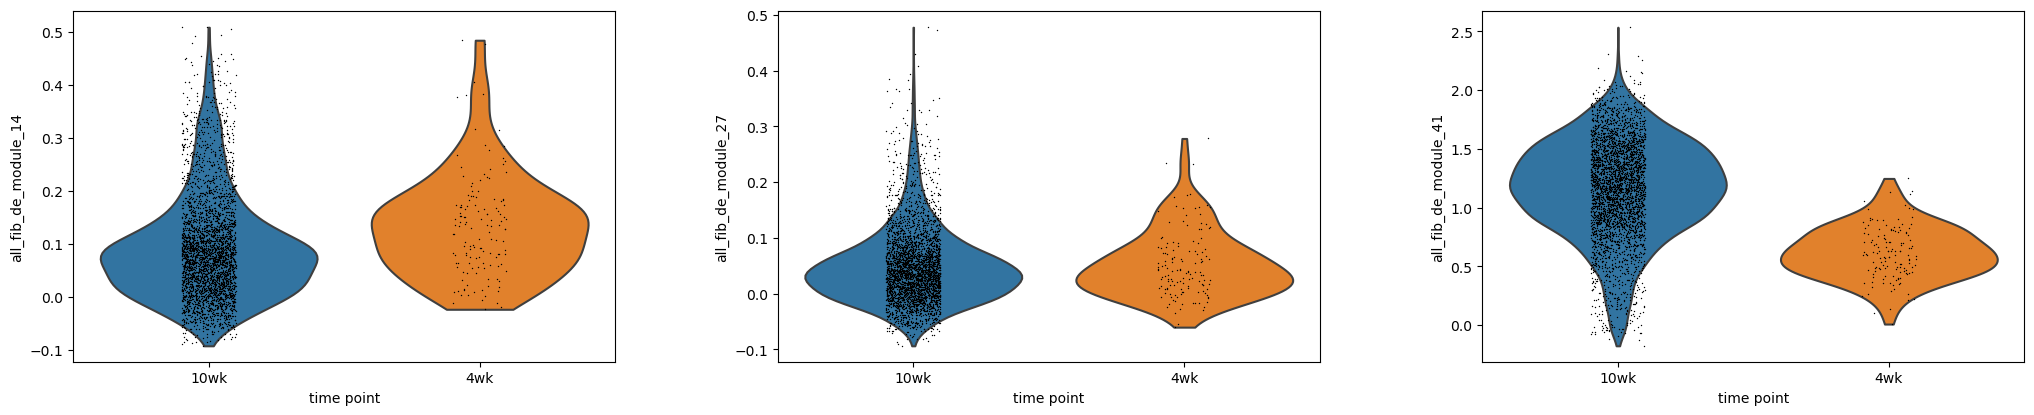

In [169]:
sc.pl.violin(NHP_Mtb_granuloma_fibroblast, keys=['all_fib_de_module_14','all_fib_de_module_27','all_fib_de_module_41'], groupby='time_point', ncols=3)




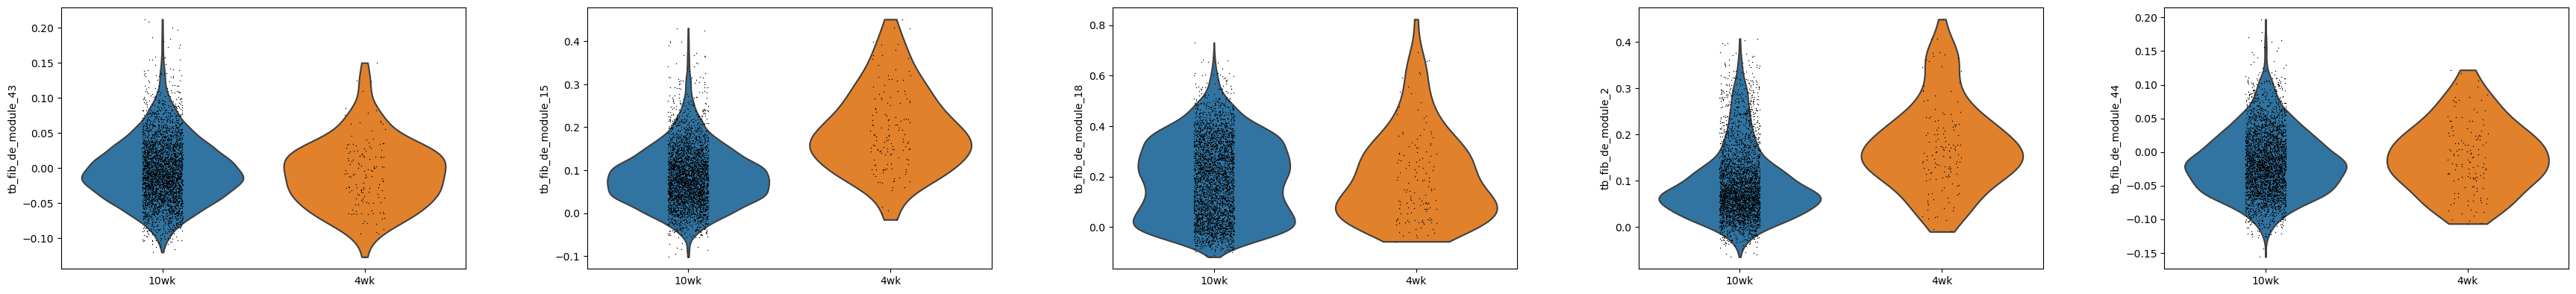

In [172]:

sc.pl.violin(NHP_Mtb_granuloma_fibroblast, keys=['tb_fib_de_module_43','tb_fib_de_module_15','tb_fib_de_module_18','tb_fib_de_module_2','tb_fib_de_module_44'], groupby='time_point', rotation=0, ncols=3)




In [173]:
score_df= NHP_Mtb_granuloma_fibroblast.obs[['time_point', 'tb_fib_de_module_43','tb_fib_de_module_15','tb_fib_de_module_18','tb_fib_de_module_2','tb_fib_de_module_44', 'all_fib_de_module_14','all_fib_de_module_27','all_fib_de_module_41']]
score_df.reset_index(inplace=True)
score_df.rename(columns={'index':'barcode'}, inplace=True)



/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_83668/2460225674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.rename(columns={'index':'barcode'}, inplace=True)


In [174]:
df2plot=pd.melt(score_df, id_vars=['barcode','time_point'])

In [175]:
df2plot

,barcode,time_point,variable,value
0,Array2_4217_TGATTGAGGGCG,10wk,tb_fib_de_module_43,0.005597
1,Array4_3917_ACTGGCTTTATT,10wk,tb_fib_de_module_43,0.052253
2,Array4_3917_CCGTCTCGAAAT,10wk,tb_fib_de_module_43,0.021479
3,Array4_3917_CCTCTAGTCGCC,10wk,tb_fib_de_module_43,-0.078087
4,Array4_3917_GAAGCTTCCCGC,10wk,tb_fib_de_module_43,0.043633
...,...,...,...,...
29435,Array5_24118_GTGCTGTCGAGA,4wk,all_fib_de_module_41,0.395183
29436,Array5_24118_CCGGTAGACGCG,4wk,all_fib_de_module_41,0.682391
29437,Array5_24118_TGAAAGGAACAG,4wk,all_fib_de_module_41,0.009826
29438,Array5_24118_GACATCGGTTTC,4wk,all_fib_de_module_41,0.450717


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

tb_fib_de_module_15_10wk v.s. tb_fib_de_module_15_4wk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.115e-37 U_stat=8.648e+04
tb_fib_de_module_43_10wk v.s. tb_fib_de_module_43_4wk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.585e+05
tb_fib_de_module_18_10wk v.s. tb_fib_de_module_18_4wk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.459e+05
tb_fib_de_module_2_10wk v.s. tb_fib_de_module_2_4wk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.009e-24 U_stat=1.188e+05
tb_fib_de_module_44_10wk v.s. tb_fib_de_module_44_4wk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.180e-01 U_stat=2.222e+05
all_fib_de_module_14_10wk v.s. all_fib_de_module_14_4wk: Mann-Whitney-Wil

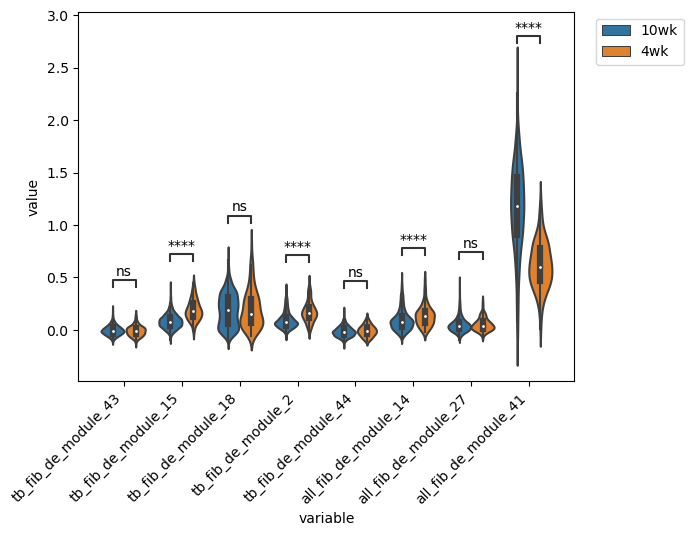

In [179]:
import statannot
import matplotlib.pyplot as plt

a = sns.violinplot(data=df2plot, x="variable", y="value", hue="time_point")
box_pairs=[]
for i in df2plot.variable.unique():
    box_pairs.append( ((i, "10wk"),(i, "4wk")))

# box_pairs=[
#         (("tb_fib_de_module_18", "PRG4$^{hi}$ Fibroblasts"),("tb_fib_de_module_18", "LTBP1$^{hi}$ Fibroblasts")),
#         (("tb_fib_de_module_18", "PRG4$^{hi}$ Fibroblasts"),("tb_fib_de_module_18", "FN1$^{hi}$, EPAS1$^{hi}$ Fibroblasts")),
#     ]
statannot.add_stat_annotation(
    a,
    data=df2plot,
    x="variable", y="value", hue="time_point",
    box_pairs=box_pairs,
    test="Mann-Whitney",
    text_format="star",
)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.savefig('figures/DE_immunology_granuloma_fibroblast_10v4Weeks_mannwhitneyU_pseudotime_DE_modules.png', dpi=300, bbox_inches='tight')

## wgcna stuff

In [36]:
top50hub_genes=pd.read_csv('../datasets/subclustering_objects/fibroblast_hgWGCNA_50hubGenes.csv', index_col=0)

In [37]:
top50hub_genes_dict={x:top50hub_genes.loc[top50hub_genes.module==x,'gene_name'].values for x in top50hub_genes.module.unique()}

In [134]:
for module in top50hub_genes_dict.keys():
    sc.tl.score_genes(NHP_Mtb_granuloma_fibroblast, gene_list=top50hub_genes_dict[module], score_name=module)

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list i

In [190]:
score_df= NHP_Mtb_granuloma_fibroblast.obs[['time_point']+list(top50hub_genes_dict.keys())]
score_df.reset_index(inplace=True)
score_df.rename(columns={'index':'barcode'}, inplace=True)
df2plot=pd.melt(score_df, id_vars=['barcode','time_point'])

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_83668/3130453793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.rename(columns={'index':'barcode'}, inplace=True)


In [191]:
score_df

,barcode,time_point,Fibroblast-M1,Fibroblast-M2,Fibroblast-M3,Fibroblast-M4,Fibroblast-M5,Fibroblast-M6,Fibroblast-M7
0,Array2_4217_TGATTGAGGGCG,10wk,-0.036284,-0.103204,-0.083785,0.021554,-0.069078,0.018273,0.007782
1,Array4_3917_ACTGGCTTTATT,10wk,-0.005353,0.311326,0.136415,-0.030339,0.152624,0.146354,0.004177
2,Array4_3917_CCGTCTCGAAAT,10wk,0.129637,0.001135,0.268022,0.059643,-0.055171,-0.054449,0.039192
3,Array4_3917_CCTCTAGTCGCC,10wk,0.030504,0.268536,0.352007,0.104900,0.382003,-0.034312,0.100763
4,Array4_3917_GAAGCTTCCCGC,10wk,-0.125690,0.273401,-0.018953,0.047731,-0.066136,0.024070,-0.016555
...,...,...,...,...,...,...,...,...,...
3675,Array5_24118_GTGCTGTCGAGA,4wk,0.148402,-0.140074,0.111966,0.057625,-0.108037,-0.129842,-0.076348
3676,Array5_24118_CCGGTAGACGCG,4wk,0.213461,0.456394,0.213343,0.018034,0.839842,0.218720,-0.042846
3677,Array5_24118_TGAAAGGAACAG,4wk,0.073396,-0.122741,0.511657,-0.023472,-0.094813,-0.076742,0.087121
3678,Array5_24118_GACATCGGTTTC,4wk,0.524397,0.368135,0.144274,0.235878,0.893196,0.045104,-0.013443


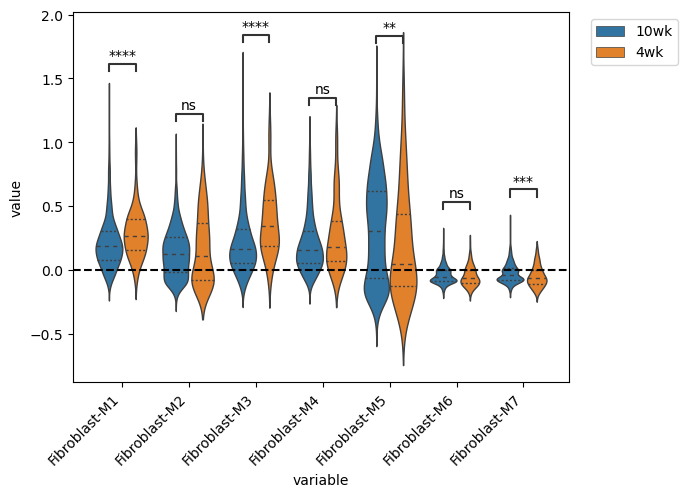

In [192]:
a=sns.violinplot(data=df2plot, x='variable', y='value', hue="time_point", linewidth=1, inner='quartile')           
box_pairs=[]
for i in df2plot.variable.unique():
    box_pairs.append( ((i, "10wk"),(i, "4wk")))

# box_pairs=[
#         (("tb_fib_de_module_18", "PRG4$^{hi}$ Fibroblasts"),("tb_fib_de_module_18", "LTBP1$^{hi}$ Fibroblasts")),
#         (("tb_fib_de_module_18", "PRG4$^{hi}$ Fibroblasts"),("tb_fib_de_module_18", "FN1$^{hi}$, EPAS1$^{hi}$ Fibroblasts")),
#     ]
statannot.add_stat_annotation(
    a,
    data=df2plot,
    x="variable", y="value", hue="time_point",
    box_pairs=box_pairs,
    test="Mann-Whitney",
    text_format="star",
    verbose=0
)
plt.xticks(rotation=45, ha='right')
plt.axhline(0,  color = 'black', linestyle = '--')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.savefig('figures/DE_cd4_depl_reinfection_fibroblast_Gran_v_uninvolved_mannwhitneyU_wgcna.png', dpi=300, bbox_inches='tight')

In [194]:
NHP_Mtb_granuloma_fibroblast.obs['nCount_RNA'] = NHP_Mtb_granuloma_fibroblast.obs['nCount_RNA'].astype('int')


NHP_Mtb_granuloma_fibroblast.obs['nFeature_RNA'] = NHP_Mtb_granuloma_fibroblast.obs['nFeature_RNA'].astype('int')



NHP_Mtb_granuloma_fibroblast.obs['disease__time_since_onset'] = NHP_Mtb_granuloma_fibroblast.obs['disease__time_since_onset'].astype('float32')

NHP_Mtb_granuloma_fibroblast.obs['donor_id']= NHP_Mtb_granuloma_fibroblast.obs['donor_id'].astype('str')

NHP_Mtb_granuloma_fibroblast.obs['paired_ends'] =NHP_Mtb_granuloma_fibroblast.obs['paired_ends'].astype('bool')

In [195]:
NHP_Mtb_granuloma_fibroblast.write('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_bothTime_scored.h5ad')

# score with newly ran wgcna modules

In [2]:
NHP_Mtb_granuloma_fibroblast=sc.read('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_bothTime_scored.h5ad')

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
NHP_Mtb_granuloma_fibroblast.obs

,nCount_RNA,nFeature_RNA,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,disease__time_since_onset,biosample_id,biosample_type,disease,...,tb_fib_de_module_18,tb_fib_de_module_2,tb_fib_de_module_44,Fibroblast-M1,Fibroblast-M2,Fibroblast-M3,Fibroblast-M4,Fibroblast-M5,Fibroblast-M6,Fibroblast-M7
Array2_4217_TGATTGAGGGCG,2376,1360,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma22,PrimaryBioSample_Tissue,MONDO_0018076,...,0.000658,0.126490,-0.007666,-0.036284,-0.103204,-0.083785,0.021554,-0.069078,0.018273,0.007782
Array4_3917_ACTGGCTTTATT,1840,1146,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma11,PrimaryBioSample_Tissue,MONDO_0018076,...,0.169657,0.121121,-0.011702,-0.005353,0.311326,0.136415,-0.030339,0.152624,0.146354,0.004177
Array4_3917_CCGTCTCGAAAT,745,536,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma11,PrimaryBioSample_Tissue,MONDO_0018076,...,-0.017981,0.031202,-0.008346,0.129637,0.001135,0.268022,0.059643,-0.055171,-0.054449,0.039192
Array4_3917_CCTCTAGTCGCC,1751,911,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma11,PrimaryBioSample_Tissue,MONDO_0018076,...,0.203885,0.119838,-0.122360,0.030504,0.268536,0.352007,0.104900,0.382003,-0.034312,0.100763
Array4_3917_GAAGCTTCCCGC,866,514,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,10.0,Granuloma11,PrimaryBioSample_Tissue,MONDO_0018076,...,0.101654,0.080730,-0.019518,-0.125690,0.273401,-0.018953,0.047731,-0.066136,0.024070,-0.016555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array5_24118_GTGCTGTCGAGA,1764,916,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,4.0,Array5_24118,PrimaryBioSample_Tissue,MONDO_0018076,...,-0.030532,0.137396,0.002434,0.148402,-0.140074,0.111966,0.057625,-0.108037,-0.129842,-0.076348
Array5_24118_CCGGTAGACGCG,1776,917,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,4.0,Array5_24118,PrimaryBioSample_Tissue,MONDO_0018076,...,0.465226,-0.004923,-0.051511,0.213461,0.456394,0.213343,0.018034,0.839842,0.218720,-0.042846
Array5_24118_TGAAAGGAACAG,1188,718,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,4.0,Array5_24118,PrimaryBioSample_Tissue,MONDO_0018076,...,-0.056910,0.107398,0.075355,0.073396,-0.122741,0.511657,-0.023472,-0.094813,-0.076742,0.087121
Array5_24118_GACATCGGTTTC,1401,709,NCBITaxon_9541,Macaca fascicularis,EFO_0008919,Seq-Well,4.0,Array5_24118,PrimaryBioSample_Tissue,MONDO_0018076,...,0.389175,0.128973,0.024188,0.524397,0.368135,0.144274,0.235878,0.893196,0.045104,-0.013443


In [3]:
top50hub_genes=pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/new_man_tables/fibroblast_noDoub_hgWGCNA_50hubGenes.csv', index_col=0)

In [4]:
top50hub_genes_dict={x:top50hub_genes.loc[top50hub_genes.module==x,'gene_name'].values for x in top50hub_genes.module.unique()}

In [5]:
top50hub_genes_dict.keys()

dict_keys(['Fibroblast-M1', 'Fibroblast-M2', 'Fibroblast-M3', 'Fibroblast-M4', 'Fibroblast-M5', 'Fibroblast-M6', 'Fibroblast-M7'])

In [7]:
for module in top50hub_genes_dict.keys():
    sc.tl.score_genes(NHP_Mtb_granuloma_fibroblast, gene_list=top50hub_genes_dict[module], score_name=module)

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list i

In [12]:
NHP_Mtb_granuloma_fibroblast.write('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_bothTime_scored_231002.h5ad')

In [3]:
NHP_Mtb_granuloma_fibroblast=sc.read('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_bothTime_scored_231002.h5ad')

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_64171/2561777105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.rename(columns={'index':'barcode'}, inplace=True)


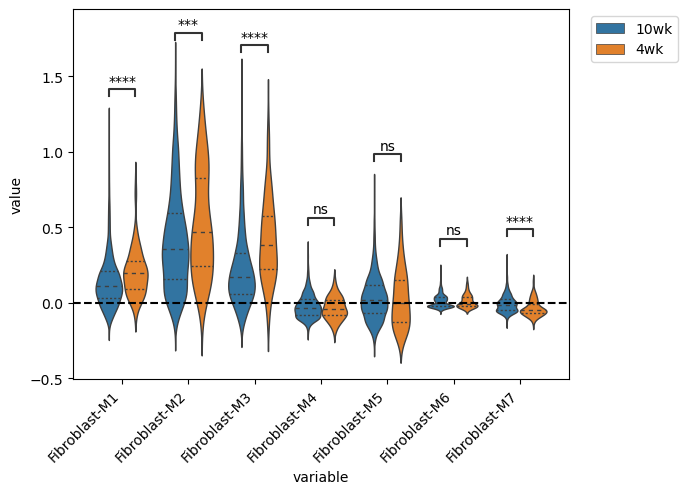

In [5]:
score_df= NHP_Mtb_granuloma_fibroblast.obs[['time_point']+[ 'Fibroblast-M'+str(x) for x in range(1, 8)]]
score_df.reset_index(inplace=True)
score_df.rename(columns={'index':'barcode'}, inplace=True)
df2plot=pd.melt(score_df, id_vars=['barcode','time_point'])
a=sns.violinplot(data=df2plot, x='variable', y='value', hue="time_point", linewidth=1, inner='quartile')           
box_pairs=[]
for i in df2plot.variable.unique():
    box_pairs.append( ((i, "10wk"),(i, "4wk")))

# box_pairs=[
#         (("tb_fib_de_module_18", "PRG4$^{hi}$ Fibroblasts"),("tb_fib_de_module_18", "LTBP1$^{hi}$ Fibroblasts")),
#         (("tb_fib_de_module_18", "PRG4$^{hi}$ Fibroblasts"),("tb_fib_de_module_18", "FN1$^{hi}$, EPAS1$^{hi}$ Fibroblasts")),
#     ]
statannot.add_stat_annotation(
    a,
    data=df2plot,
    x="variable", y="value", hue="time_point",
    box_pairs=box_pairs,
    test="Mann-Whitney",
    text_format="star",
    comparisons_correction=None, 
    verbose=0
)
plt.xticks(rotation=45, ha='right')
plt.axhline(0,  color = 'black', linestyle = '--')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('../new_man_figs/Fig3/immunity_TB_NHP_gran_4_10wk_mannwhitneyU_wgcna.pdf', dpi=300, bbox_inches='tight')

In [3]:
score_df= NHP_Mtb_granuloma_fibroblast.obs[['time_point','Fibroblast-M1']]
score_df.reset_index(inplace=True)
score_df.rename(columns={'index':'barcode'}, inplace=True)
df2plot=pd.melt(score_df, id_vars=['barcode','time_point'])

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_18767/2002118259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df.rename(columns={'index':'barcode'}, inplace=True)


In [4]:
df2plot

,barcode,time_point,variable,value
0,Array2_4217_TGATTGAGGGCG,10wk,Fibroblast-M1,0.000218
1,Array4_3917_ACTGGCTTTATT,10wk,Fibroblast-M1,0.054178
2,Array4_3917_CCGTCTCGAAAT,10wk,Fibroblast-M1,0.112439
3,Array4_3917_CCTCTAGTCGCC,10wk,Fibroblast-M1,0.019213
4,Array4_3917_GAAGCTTCCCGC,10wk,Fibroblast-M1,-0.117890
...,...,...,...,...
3675,Array5_24118_GTGCTGTCGAGA,4wk,Fibroblast-M1,0.118548
3676,Array5_24118_CCGGTAGACGCG,4wk,Fibroblast-M1,0.159468
3677,Array5_24118_TGAAAGGAACAG,4wk,Fibroblast-M1,0.024706
3678,Array5_24118_GACATCGGTTTC,4wk,Fibroblast-M1,0.475468


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

10wk v.s. 4wk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.366e-08 U_stat=1.805e+05


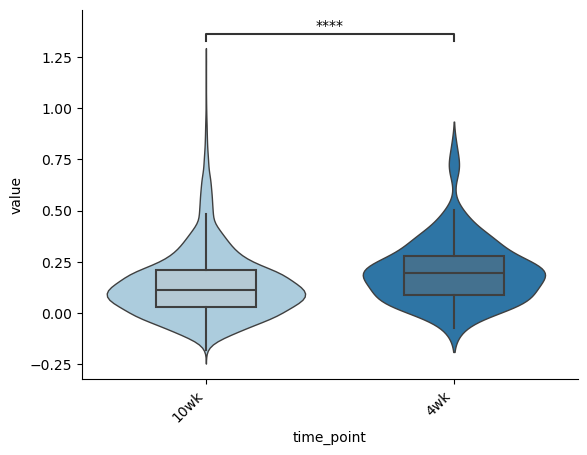

In [5]:
import statannot
a=sns.violinplot(data=df2plot, x='time_point', y='value', palette='Paired',saturation=0.8,linewidth=1, inner=None)           
sns.boxplot(data=df2plot, x='time_point', y='value', saturation=0.5, width=0.4,showfliers=False,showcaps=False,
            palette='Paired', boxprops={'zorder': 2}, ax=a)
box_pairs=[]

box_pairs.append( ("10wk", "4wk"))

statannot.add_stat_annotation(
    a,
    data=df2plot,
    x="time_point", y="value", 
    box_pairs=box_pairs,
    test="Mann-Whitney",
    text_format="star",
)
sns.despine()
plt.xticks(rotation=45, ha='right')
plt.savefig('../new_man_figs/Fig3/immunity_TB_NHP_gran_4_10wk_mannwhitneyU_wgcna_M1only.pdf.pdf', dpi=300, bbox_inches='tight')

In [15]:
NHP_Mtb_granuloma_fibroblast.obs.columns

Index(['nCount_RNA', 'nFeature_RNA', 'species', 'species__ontology_label',
       'library_preparation_protocol',
       'library_preparation_protocol__ontology_label',
       'disease__time_since_onset', 'biosample_id', 'biosample_type',
       'disease', 'disease__ontology_label', 'donor_id', 'organ',
       'organ__ontology_label', 'cell_type', 'cell_type__ontology_label',
       'is_living', 'sex', 'disease__time_since_onset__unit_label',
       'disease__time_since_onset__unit', 'paired_ends', 'end_bias',
       'time_point', 'all_fib_de_module_14', 'all_fib_de_module_27',
       'all_fib_de_module_41', 'tb_fib_de_module_43', 'tb_fib_de_module_15',
       'tb_fib_de_module_18', 'tb_fib_de_module_2', 'tb_fib_de_module_44',
       'Fibroblast-M1', 'Fibroblast-M2', 'Fibroblast-M3', 'Fibroblast-M4',
       'Fibroblast-M5', 'Fibroblast-M6', 'Fibroblast-M7'],
      dtype='object')

In [8]:
meta=pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/metadata/Updated10wk_alexandria_structured_metadata10.txt', sep='\t', header=0)

/var/folders/zb/n6r7y_cx349fd9bg4gvsb0340000gq/T/ipykernel_39597/2200802244.py:1: DtypeWarning: Columns (1,2,10,15,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  meta=pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/metadata/Updated10wk_alexandria_structured_metadata10.txt', sep='\t', header=0)


In [9]:
meta= meta.iloc[1:, :]

In [7]:
meta.GranulomaTiming.value_counts()

Early    76780
Late     32804
Name: GranulomaTiming, dtype: int64

In [8]:
meta_4wk=pd.read_csv('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_4wk/metadata/Updated4wk_alexandria_structured_metadata3.txt',
                 sep='\t', header=0)

In [9]:
meta_4wk= meta_4wk.iloc[1:, :]

In [10]:
meta_4wk

,NAME,nCount_RNA,nFeature_RNA,biosample_id,donor_id,CellTypeAnnotations,Log10_CFU,species,species__ontology_label,disease,...,biosample_type,disease__time_since_onset,disease__time_since_onset__unit,disease__time_since_onset__unit_label,library_preparation_protocol,library_preparation_protocol__ontology_label,organ,organ__ontology_label,cell_type,cell_type__ontology_label
1,Array4_23118_TATTACCCCGCA,16699,4583,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
2,Array4_23118_CTCTTCCGCCTA,15944,4321,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
3,Array4_23118_CATGTCTCCTGC,14979,4839,Array4_23118,23118,Fibroblast,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000057,fibroblast
4,Array4_23118_GTAACTCCCCGA,12295,3922,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
5,Array4_23118_CGCCGTCTGATC,12398,4017,Array4_23118,23118,Macrophage,5.3096323,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Array6_24118_CGAATATTCCAA,525,337,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
10003,Array6_24118_TCTTGATCGCCC,511,354,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
10004,Array6_24118_CTACCCTGTCGT,513,331,Array6_24118,24118,T,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000084,T cell
10005,Array6_24118_CGTCGGCATCCT,509,323,Array6_24118,24118,Macrophage,4.26484143,NCBITaxon_9541,Macaca fascicularis,MONDO_0018076,...,PrimaryBioSample_Tissue,4.0,UO_0000034,week,EFO_0008919,Seq-Well,UBERON_0002048,lung,CL_0000235,macrophage


In [12]:
# NHP_Mtb_granuloma_fibroblast=sc.read('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_bothTime_scored.h5ad')
NHP_Mtb_granuloma_fibroblast=sc.read('/Users/nl646/Desktop/Shalek_Lab/Human_TB/datasets/NHP_Mtb_granuloma_10wk/NHP_Mtb_granuloma_bothTime_scored_231002.h5ad')

/Users/nl646/miniconda3/envs/sc_1_9_env/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [13]:
NHP_Mtb_granuloma_fibroblast

AnnData object with n_obs × n_vars = 3680 × 22121
    obs: 'nCount_RNA', 'nFeature_RNA', 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'disease__time_since_onset', 'biosample_id', 'biosample_type', 'disease', 'disease__ontology_label', 'donor_id', 'organ', 'organ__ontology_label', 'cell_type', 'cell_type__ontology_label', 'is_living', 'sex', 'disease__time_since_onset__unit_label', 'disease__time_since_onset__unit', 'paired_ends', 'end_bias', 'time_point', 'all_fib_de_module_14', 'all_fib_de_module_27', 'all_fib_de_module_41', 'tb_fib_de_module_43', 'tb_fib_de_module_15', 'tb_fib_de_module_18', 'tb_fib_de_module_2', 'tb_fib_de_module_44', 'Fibroblast-M1', 'Fibroblast-M2', 'Fibroblast-M3', 'Fibroblast-M4', 'Fibroblast-M5', 'Fibroblast-M6', 'Fibroblast-M7'
    uns: 'time_point_colors'
    layers: 'counts'

In [14]:
NHP_Mtb_granuloma_fibroblast.obs['Log10_CFU']=0.0

In [15]:
NHP_Mtb_granuloma_fibroblast.obs.loc[meta_4wk.loc[meta_4wk.cell_type__ontology_label=='fibroblast', 'NAME'], 'Log10_CFU'] =meta_4wk.loc[meta_4wk.cell_type__ontology_label=='fibroblast', 'Log10_CFU'].values

In [16]:
NHP_Mtb_granuloma_fibroblast.obs.loc[meta.loc[meta.cell_type__ontology_label=='fibroblast', 'NAME'], 'Log10_CFU'] =meta.loc[meta.cell_type__ontology_label=='fibroblast', 'Log10_CFU_per_granuloma'].values

In [18]:
NHP_Mtb_granuloma_fibroblast.obs['Log10_CFU']=NHP_Mtb_granuloma_fibroblast.obs['Log10_CFU'].astype('float64')

In [20]:
fib_count=NHP_Mtb_granuloma_fibroblast.obs[['time_point', 'biosample_id']].groupby(['time_point','biosample_id']).size().reset_index()

In [21]:
fib_count.rename(columns={0:'count'}, inplace=True)

In [23]:
fib_count =fib_count.loc[fib_count['count']>0,:]

In [25]:
# check burden per gran
burden_fib_grans=NHP_Mtb_granuloma_fibroblast.obs[['Log10_CFU', 'time_point', 'biosample_id']].groupby(['time_point', 'biosample_id']).mean().reset_index().dropna()

In [27]:
burden_fib_grans=burden_fib_grans.merge(fib_count, left_on=['time_point','biosample_id'], right_on=['time_point','biosample_id'])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

10wk v.s. 4wk: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.997e-03 U_stat=6.000e+00


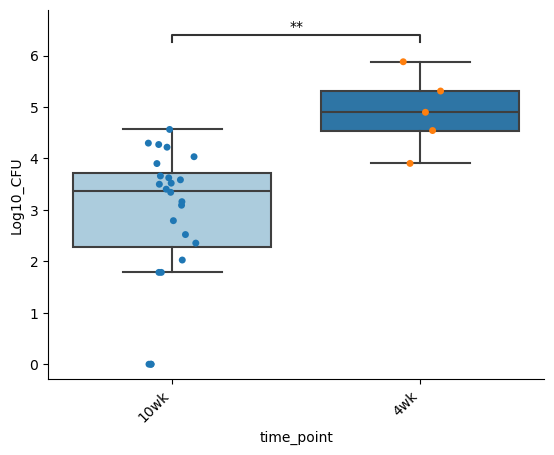

In [40]:
# sns.boxplot(data=burden_fib_grans,x = 'time_point', y='Log10_CFU')
# sns.stripplot(data=burden_fib_grans,x = 'time_point', y='Log10_CFU', c='black')


import statannot
# a=sns.violinplot(data=burden_fib_grans, x='time_point', y='Log10_CFU', palette='Paired',saturation=0.8,linewidth=1, inner=None)           
# sns.boxplot(data=burden_fib_grans, x='time_point', y='Log10_CFU', saturation=0.5, width=0.4,showfliers=False,showcaps=False,
#             palette='Paired', boxprops={'zorder': 2}, ax=a)
a=sns.boxplot(data=burden_fib_grans,x = 'time_point', y='Log10_CFU',palette='Paired',saturation=0.8,showfliers=False,showcaps=True)
sns.stripplot(data=burden_fib_grans,x = 'time_point', y='Log10_CFU', c='b')
box_pairs=[]

box_pairs.append( ("10wk", "4wk"))

statannot.add_stat_annotation(
    a,
    data=burden_fib_grans,
    x="time_point", y="Log10_CFU", 
    box_pairs=box_pairs,
    test="Mann-Whitney",
    text_format="star",
)
sns.despine()
plt.xticks(rotation=45, ha='right')



plt.savefig('../new_man_figs/Fig3/boxplot_immunity_NHP_4_vs_10wk_burden_withTest.pdf')